In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%cd /content/drive/My Drive/

Mounted at /content/drive
/content/drive/My Drive


## **Read Dataset and check basic descriptive statistics**

In [ ]:
df = pd.read_csv('Bank_Churn/train.csv')
df.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# Check datatypes, 11 quantitative, 3 categorical
data_type_counts = df.dtypes.value_counts()
print(data_type_counts)

int64      6
float64    5
object     3
Name: count, dtype: int64


## **Check missing value and outliers, train test split & drop irrelevant features**

In [ ]:
#Null Value Columns, no null value
nullseries= df.isna().sum()
print(nullseries[nullseries > 0])

Series([], dtype: int64)


In [ ]:
#Drop irrelevant variables
x = df.drop(columns=['Exited','id', 'CustomerId' ,'Surname'])
y = df['Exited']

# Use K-Fold during Model Training stage
from sklearn.model_selection import train_test_split
# Split the dataset into 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


## **Exploratory Data Analysis**

### Univariate Analysis

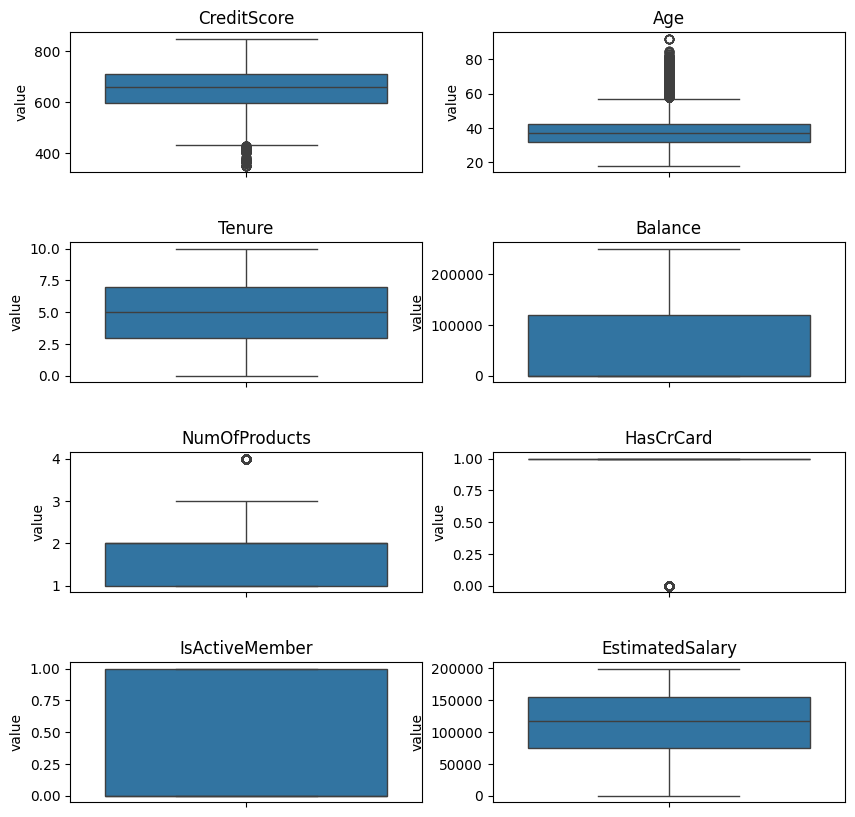

In [ ]:
# Check outliers
import numpy as np
x_numeric = x_train.select_dtypes(include=['int64', 'float64'])

numeric_variable = x_numeric.columns.to_list()

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(10,10))

for idx, col in enumerate(numeric_variable):
    row = idx // 2
    cols = idx % 2
    ax = axes[row,cols]
    sns.boxplot(x_numeric[col],ax=ax)
    ax.set_title(f'{col}')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    ax.set_xlabel('')  # Remove x-axis label for better clarity
    ax.set_ylabel('value')
    plt.subplots_adjust(hspace=0.5)  # Add vertical spacing between subplots

#There are outliers for some variables. We should drop those with too many number of products. We should keep outliers as they are normal not

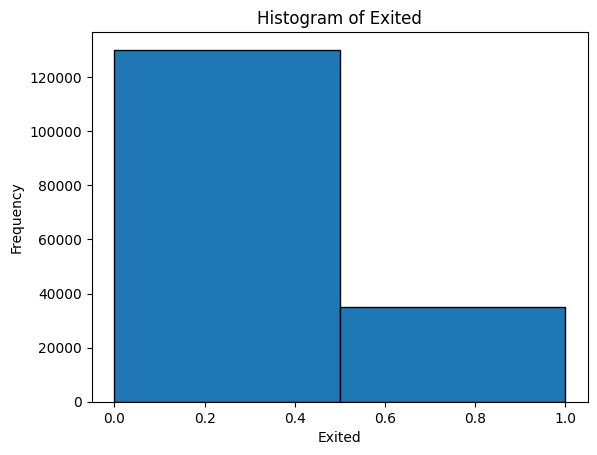

In [ ]:
#Create Histogram of Exited
import matplotlib.pyplot as plt

plt.hist(df['Exited'], bins=2, edgecolor='black')  # Assuming binary data, adjust 'bins' as needed
plt.xlabel('Exited')
plt.ylabel('Frequency')
plt.title('Histogram of Exited')
plt.show()

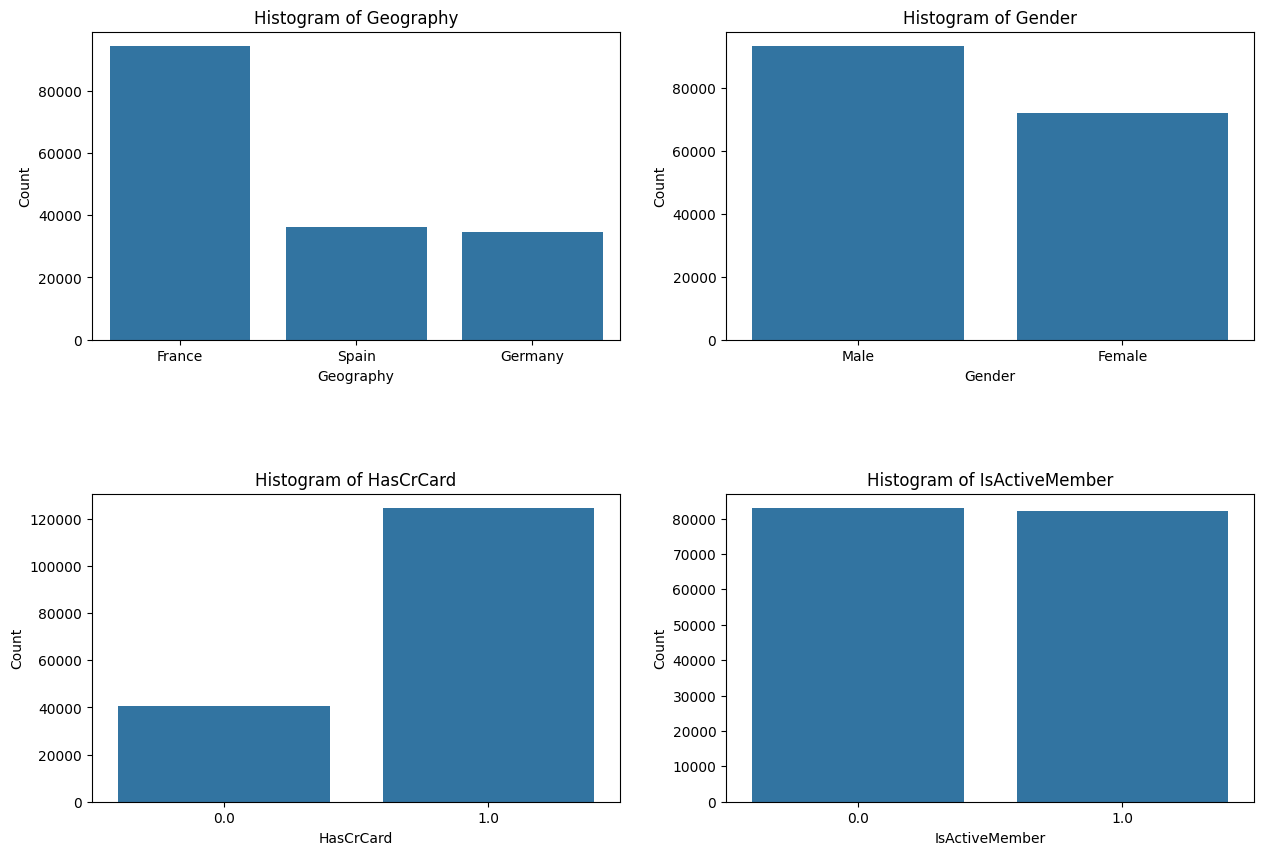

In [ ]:
#Create Histogram of All Categorical and Boolean Variables
# Create subplots


object_columns = ['Geography','Gender','HasCrCard','IsActiveMember']

fig, axes = plt.subplots(2, 2, figsize=(15,10))
for i, col in enumerate(object_columns):
    row = i // 2
    cols = i % 2
    ax = axes[row, cols]
    sns.barplot(df[col].value_counts(),ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    plt.subplots_adjust(hspace=0.5)

### Bivariate Analysis

['Geography', 'Gender']


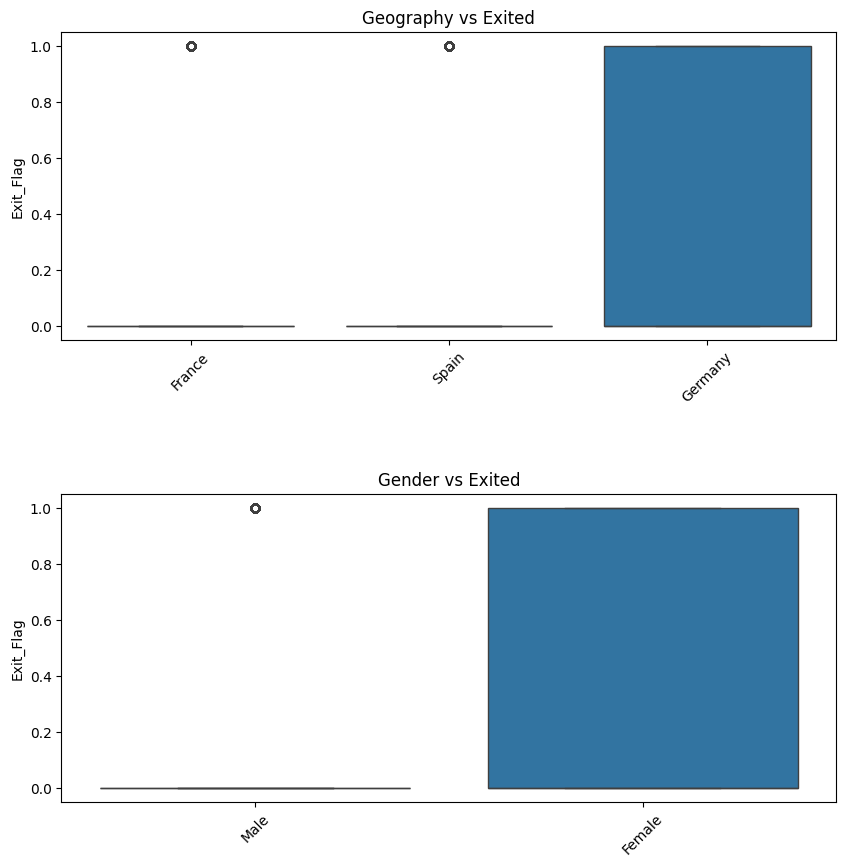

In [ ]:
x_categorical = x_train.select_dtypes(include=['object'])
categorical_variable = x_categorical.columns.tolist()
print(categorical_variable)

import numpy as np

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

for idx, col in enumerate(categorical_variable):
    ax = axes[idx]
    sns.boxplot(x=x_categorical[col], y=y_train,ax=ax)
    ax.set_title(f'{col} vs Exited')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    ax.set_xlabel('')  # Remove x-axis label for better clarity
    ax.set_ylabel('Exit_Flag')
    plt.subplots_adjust(hspace=0.5)  # Add vertical spacing between subplots

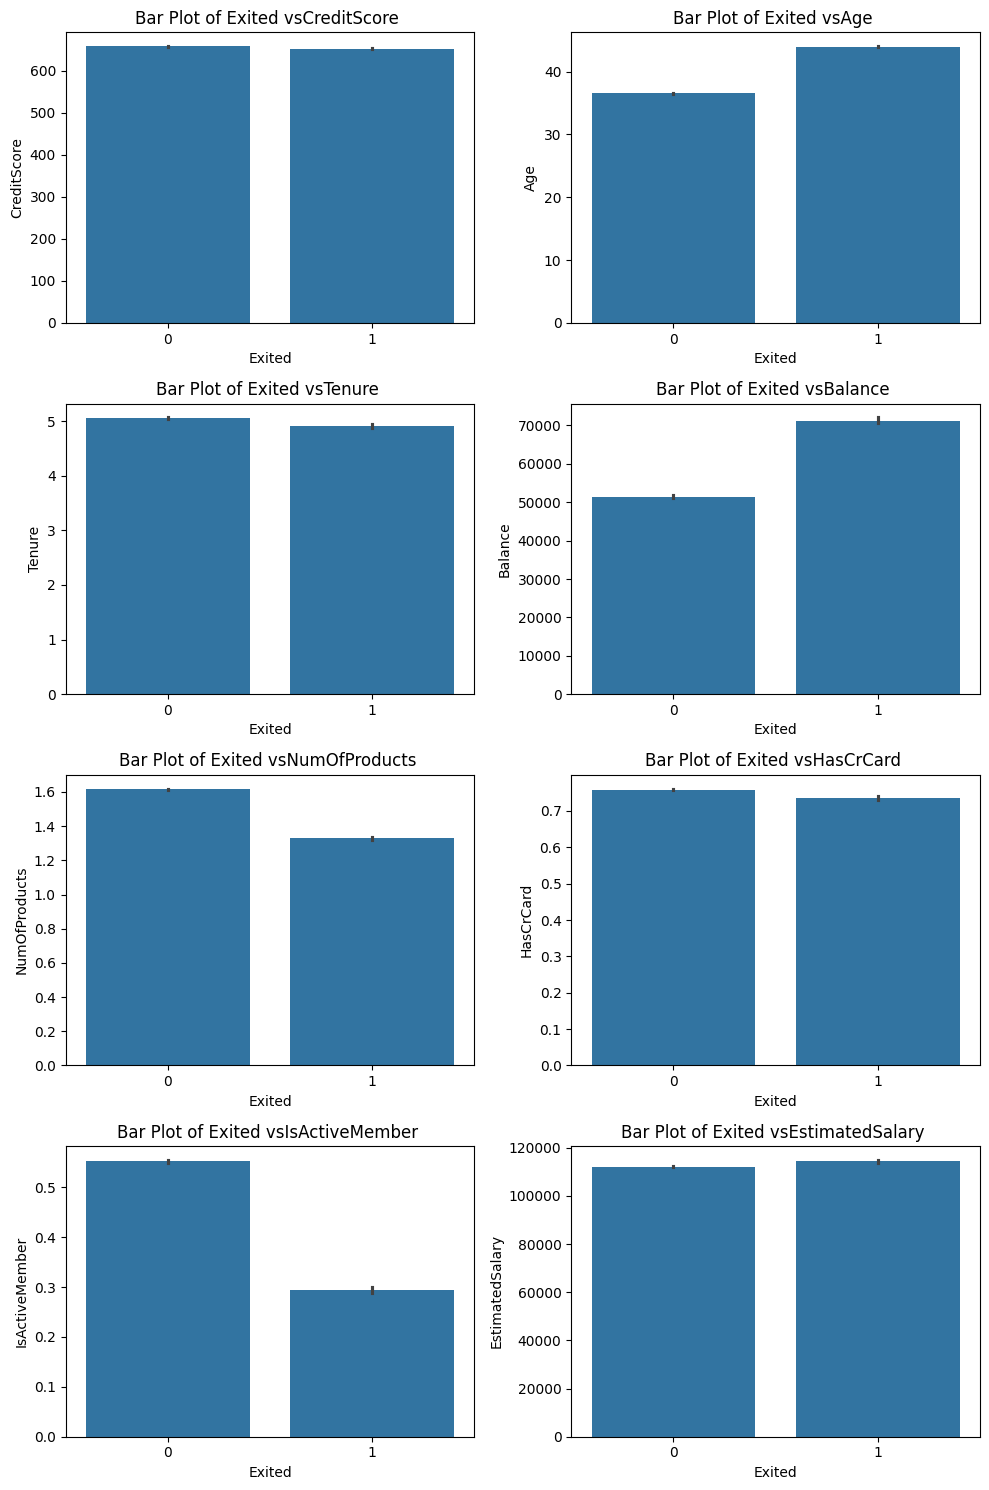

In [ ]:
numeric_columns = x_train.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 15))

for i, col in enumerate(numeric_columns):
    plt.subplot(4, 2, i + 1)
    sns.barplot(x=y_train,y=x_train[col])
    plt.title(f'Bar Plot of Exited vs{col} ')
    plt.xlabel('Exited')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Multivariate Analysis

<ipython-input-8-094b3b1bcded>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=correlation_matrix.index, y=correlation_matrix, palette='coolwarm')
<ipython-input-8-094b3b1bcded>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90, ha='right')  # Rotate x-axis labels


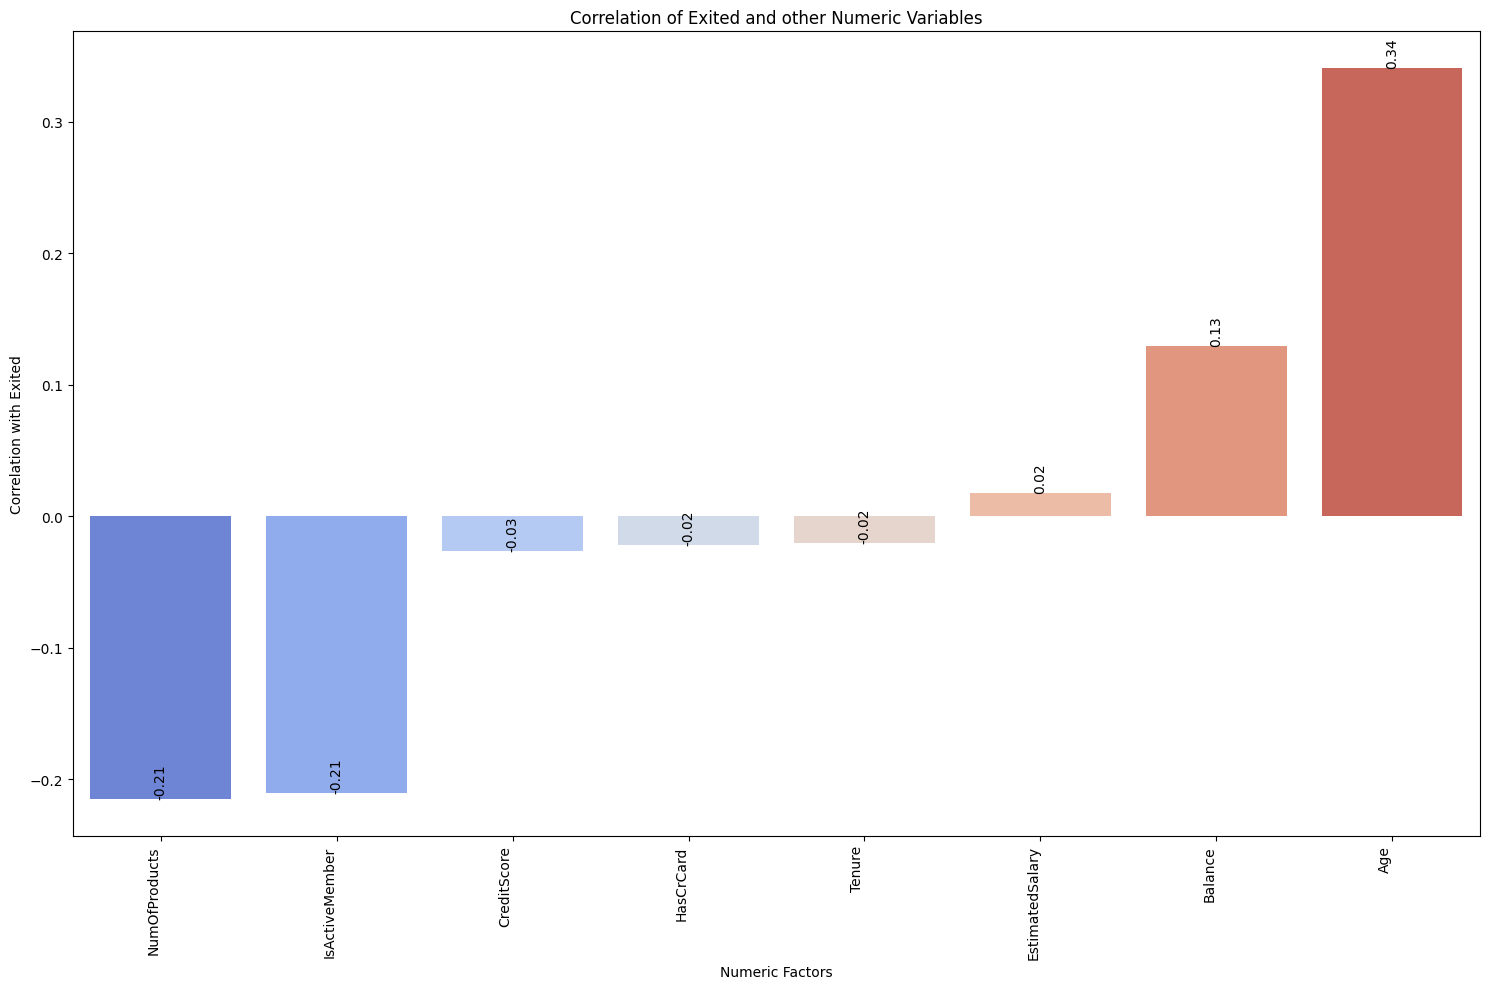

In [ ]:
#Create heat map of all numeric variables
# Select only numeric variables
x_numeric = x_train.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
train_data = pd.concat([x_numeric, y], axis=1)
correlation_matrix = train_data.corr()
correlation_matrix = correlation_matrix['Exited'].drop('Exited').sort_values()
correlation_matrix=correlation_matrix.sort_values()

# Plot barplot for correlation
plt.figure(figsize=(15, 10))
bar_plot = sns.barplot(x=correlation_matrix.index, y=correlation_matrix, palette='coolwarm')
plt.title('Correlation of Exited and other Numeric Variables')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90, ha='right')  # Rotate x-axis labels
plt.xlabel('Numeric Factors')
plt.ylabel('Correlation with Exited')
for index, value in enumerate(correlation_matrix):
    plt.text(index, value, f'{value:.2f}', rotation=90, ha='center', va='bottom')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

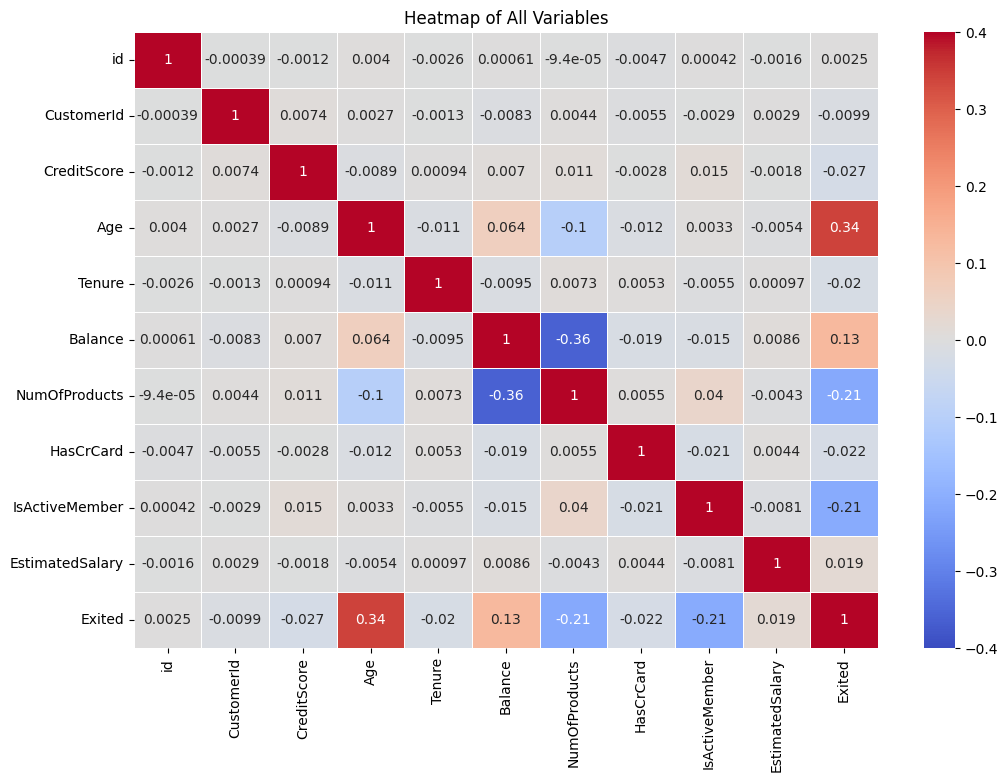

In [ ]:
# Create a heatmap
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-0.4, vmax=0.4, linewidths=0.5, linecolor='white')
plt.title('Heatmap of All Variables')
plt.show()

## **Feature Engineering**

In [ ]:
x_encoded_train = x_train.copy()

In [ ]:
x_encoded_train['BalanceRange'] = x_encoded_train['Balance'].apply(lambda x: '>10000' if x > 10000 else '<=10000')

In [ ]:
bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']

x_encoded_train['AgeGroup'] = pd.cut(x_encoded_train['Age'], bins=bins, labels=labels, right=False)

In [ ]:
x_encoded_train = pd.get_dummies(x_encoded_train)

In [ ]:
x_encoded_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,...,Gender_Female,Gender_Male,BalanceRange_<=10000,BalanceRange_>10000,AgeGroup_<20,AgeGroup_20-30,AgeGroup_30-40,AgeGroup_40-50,AgeGroup_50-60,AgeGroup_60+
149380,679,41.0,9,0.00,2,1.0,1.0,103560.98,True,False,...,False,True,True,False,False,False,False,True,False,False
164766,721,46.0,9,115764.32,2,1.0,0.0,102950.79,True,False,...,False,True,False,True,False,False,False,True,False,False
155569,551,35.0,5,0.00,1,1.0,0.0,155394.52,True,False,...,False,True,True,False,False,False,True,False,False,False
124304,743,31.0,3,57866.03,2,1.0,1.0,107428.42,False,False,...,True,False,False,True,False,False,True,False,False,False
108008,675,28.0,2,0.00,2,1.0,0.0,134110.93,True,False,...,False,True,True,False,False,True,False,False,False,False


In [ ]:
# Encode Test Data
x_encoded_test = x_test.copy()
x_encoded_test['BalanceRange'] = x_encoded_test['Balance'].apply(lambda x: '>10000' if x > 10000 else '<=10000')

bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']

x_encoded_test['AgeGroup'] = pd.cut(x_encoded_test['Age'], bins=bins, labels=labels, right=False)
x_encoded_test = pd.get_dummies(x_encoded_test)

x_encoded_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,...,Gender_Female,Gender_Male,BalanceRange_<=10000,BalanceRange_>10000,AgeGroup_<20,AgeGroup_20-30,AgeGroup_30-40,AgeGroup_40-50,AgeGroup_50-60,AgeGroup_60+
33042,798,31.0,8,102075.88,1,1.0,0.0,79577.48,True,False,...,True,False,False,True,False,False,True,False,False,False
36330,629,26.0,6,0.00,2,1.0,0.0,38190.78,True,False,...,False,True,True,False,False,True,False,False,False,False
59446,565,39.0,7,115163.32,3,1.0,0.0,69052.63,True,False,...,False,True,False,True,False,False,True,False,False,False
92278,653,55.0,2,70263.83,1,0.0,0.0,62347.71,False,False,...,False,True,False,True,False,False,False,False,True,False
146750,557,31.0,6,106596.29,1,1.0,0.0,91305.77,True,False,...,True,False,False,True,False,False,True,False,False,False


## **Logistic Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Create Linear Model with Standard Scaling of Independent Variable
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_encoded_train) # fit it on the training data
x_test_scaled = scaler.fit_transform(x_encoded_test)

log_reg = LogisticRegression()

# Parameter Grid
param_grid = {
    'C': [0.01, 0.1, 1, 5, 10, 15, 100, 1000]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=kf, n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

# Train on tuned logistic regression
best_params = grid_search.best_params_
tuned_log_reg = LogisticRegression(**best_params)
tuned_log_reg.fit(x_train_scaled, y_train)

LogisticRegression(C=5)

In [ ]:
# Predict Train
y_train_pred = tuned_log_reg.predict(x_train_scaled)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Data):\n", train_conf_matrix)
print("\nClassification Report (Training Data):\n", classification_report(y_train, y_train_pred))

# On testing data

y_test_pred = tuned_log_reg.predict(x_test_scaled)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Testing Data):\n", test_conf_matrix)
print("\nClassification Report (Testing Data):\n", classification_report(y_test, y_test_pred))

Confusion Matrix (Training Data):
 [[99155  4906]
 [16049 11917]]

Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.86      0.95      0.90    104061
           1       0.71      0.43      0.53     27966

    accuracy                           0.84    132027
   macro avg       0.78      0.69      0.72    132027
weighted avg       0.83      0.84      0.83    132027


Confusion Matrix (Testing Data):
 [[24814  1238]
 [ 3964  2991]]

Classification Report (Testing Data):
               precision    recall  f1-score   support

           0       0.86      0.95      0.91     26052
           1       0.71      0.43      0.53      6955

    accuracy                           0.84     33007
   macro avg       0.78      0.69      0.72     33007
weighted avg       0.83      0.84      0.83     33007



Text(0.5, 427.9555555555555, 'Predicted label')

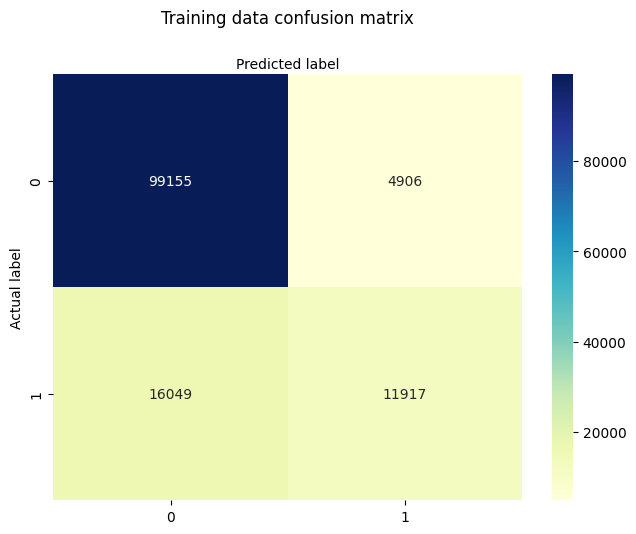

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(train_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Training data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 427.9555555555555, 'Predicted label')

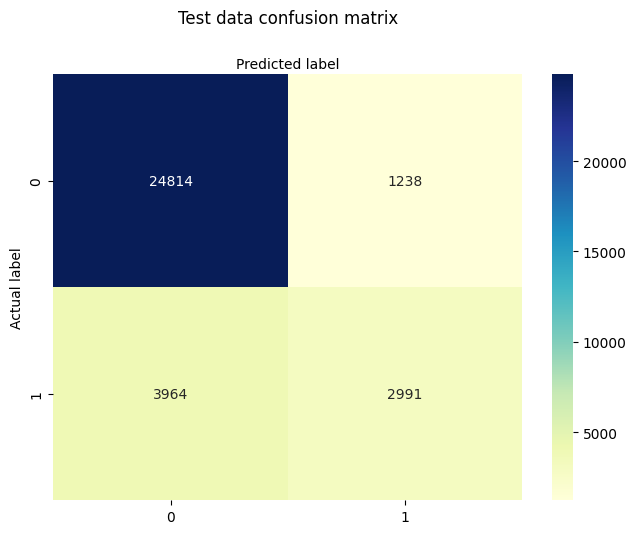

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(test_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Test data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import f1_score
print('F-1 Score for Logistic Regression:',f1_score(y_test, y_test_pred))

F-1 Score for Logistic Regression: 0.5348712446351932


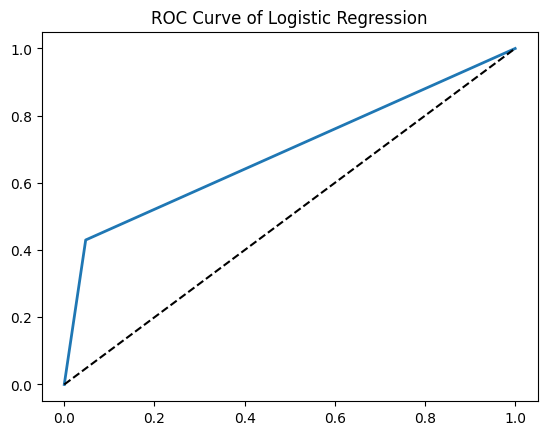

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
plt.plot(fpr, tpr, linewidth=2, label="ROC")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve of Logistic Regression')
plt.show()

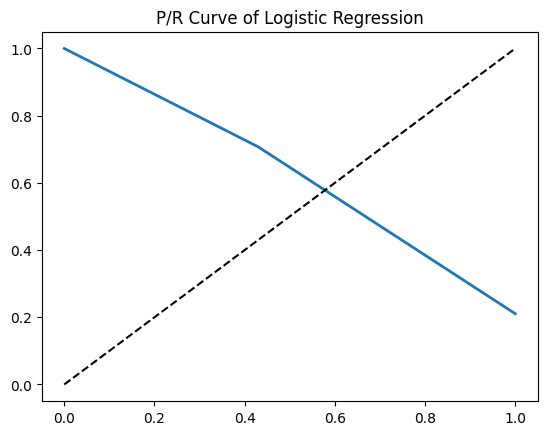

In [ ]:
# Logistic Regression
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred)
plt.plot(recall, precision, linewidth=2, label="Precision vs Recall")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('P/R Curve of Logistic Regression')
plt.show()

## KNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Create Linear Model with Standard Scaling of Independent Variable
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_encoded_train) # fit it on the training data
x_test_scaled = scaler.fit_transform(x_encoded_test)

# Initialize the KNN classifier with a chosen number of neighbors, e.g., k=5
param_grid = {'n_neighbors': np.arange(20, 80,20)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(x_train_scaled, y_train)


best_knn = grid_search.best_estimator_
print(f"Best number of neighbors: {grid_search.best_params_['n_neighbors']}")


y_pred = best_knn.predict(x_train_scaled)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best number of neighbors: 20


In [ ]:
y_pred = best_knn.predict(x_train_scaled)

In [ ]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred)
train_conf_matrix = confusion_matrix(y_train, y_pred)
train_class_report = classification_report(y_train, y_pred)

# Print evaluation metrics
print("Confusion Matrix(training):")
print(train_conf_matrix)
print("Classification Report(training):")
print(train_class_report)

Confusion Matrix(training):
[[99779  4282]
 [13836 14130]]
Classification Report(training):
              precision    recall  f1-score   support

           0       0.88      0.96      0.92    104061
           1       0.77      0.51      0.61     27966

    accuracy                           0.86    132027
   macro avg       0.82      0.73      0.76    132027
weighted avg       0.85      0.86      0.85    132027



Text(0.5, 427.9555555555555, 'Predicted label')

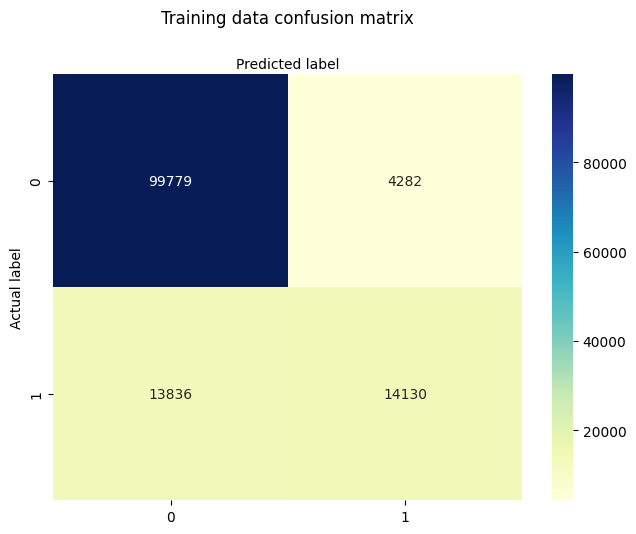

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(train_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Training data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
y_pred = best_knn.predict(x_test_scaled)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
test_conf_matrix = confusion_matrix(y_test, y_pred)
test_class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Confusion Matrix(Testing):")
print(test_conf_matrix)
print("Classification Report(Testing):")
print(test_class_report)

Confusion Matrix(Testing):
[[24780  1272]
 [ 3573  3382]]
Classification Report(Testing):
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     26052
           1       0.73      0.49      0.58      6955

    accuracy                           0.85     33007
   macro avg       0.80      0.72      0.75     33007
weighted avg       0.84      0.85      0.84     33007



Text(0.5, 427.9555555555555, 'Predicted label')

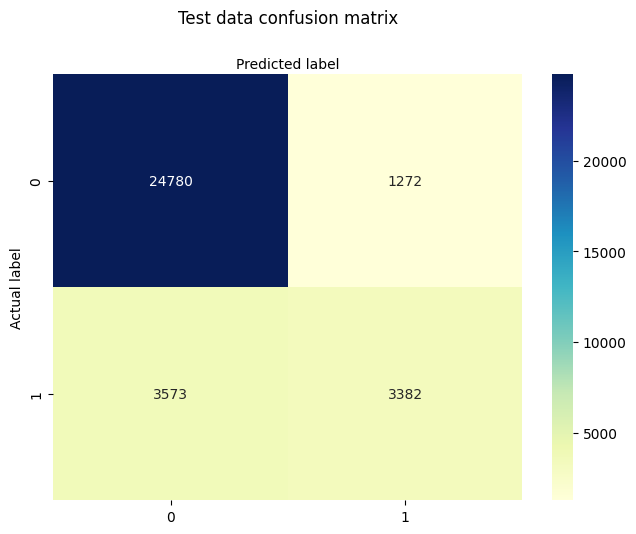

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(test_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Test data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

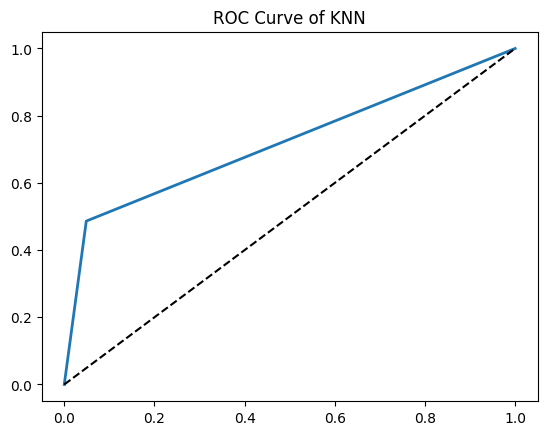

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, linewidth=2, label="ROC")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve of KNN')
plt.show()

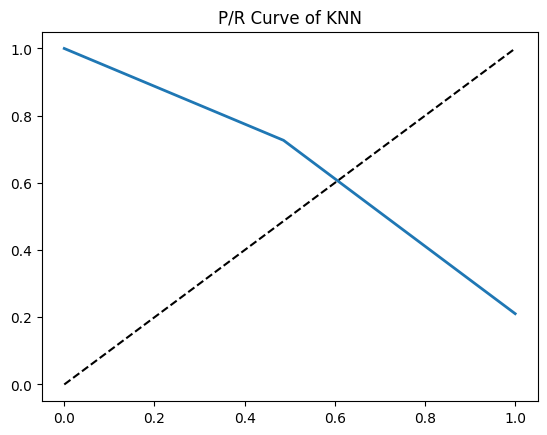

In [ ]:
# Logistic Regression
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, linewidth=2, label="Precision vs Recall")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('P/R Curve of KNN')
plt.show()

## Random Forest

In [ ]:
# These are encoded, feature engineered train and test dataset
x_encoded_test.head()
x_encoded_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,...,Gender_Female,Gender_Male,BalanceRange_<=10000,BalanceRange_>10000,AgeGroup_<20,AgeGroup_20-30,AgeGroup_30-40,AgeGroup_40-50,AgeGroup_50-60,AgeGroup_60+
149380,679,41.0,9,0.00,2,1.0,1.0,103560.98,True,False,...,False,True,True,False,False,False,False,True,False,False
164766,721,46.0,9,115764.32,2,1.0,0.0,102950.79,True,False,...,False,True,False,True,False,False,False,True,False,False
155569,551,35.0,5,0.00,1,1.0,0.0,155394.52,True,False,...,False,True,True,False,False,False,True,False,False,False
124304,743,31.0,3,57866.03,2,1.0,1.0,107428.42,False,False,...,True,False,False,True,False,False,True,False,False,False
108008,675,28.0,2,0.00,2,1.0,0.0,134110.93,True,False,...,False,True,True,False,False,True,False,False,False,False


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

rand_forest = RandomForestClassifier()

# Parameter Grid
param_grid = {
    'n_estimators': [10, 100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [2, 4, 6, 8, 10],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Grid Search
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rand_forest, param_grid, cv=kf, n_jobs=-1)
grid_search.fit(x_encoded_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100]})

In [ ]:
best_params = grid_search.best_params_
tuned_rand_forest = RandomForestClassifier(**best_params)
tuned_rand_forest.fit(x_encoded_train, y_train)
best_params

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [ ]:
# Predict
rand_forest_y_train_pred = tuned_rand_forest.predict(x_encoded_train)
train_conf_matrix = confusion_matrix(y_train, rand_forest_y_train_pred)
print("Confusion Matrix (Training Data):\n", train_conf_matrix)
print("\nClassification Report (Training Data):\n", classification_report(y_train, rand_forest_y_train_pred))

# On testing data
rand_forest_y_test_pred = tuned_rand_forest.predict(x_encoded_test)
test_conf_matrix = confusion_matrix(y_test, rand_forest_y_test_pred)
print("\nConfusion Matrix (Testing Data):\n", test_conf_matrix)
print("\nClassification Report (Testing Data):\n", classification_report(y_test, rand_forest_y_test_pred))

Confusion Matrix (Training Data):
 [[100262   3799]
 [ 13483  14483]]

Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.88      0.96      0.92    104061
           1       0.79      0.52      0.63     27966

    accuracy                           0.87    132027
   macro avg       0.84      0.74      0.77    132027
weighted avg       0.86      0.87      0.86    132027


Confusion Matrix (Testing Data):
 [[25014  1038]
 [ 3467  3488]]

Classification Report (Testing Data):
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     26052
           1       0.77      0.50      0.61      6955

    accuracy                           0.86     33007
   macro avg       0.82      0.73      0.76     33007
weighted avg       0.86      0.86      0.85     33007



In [ ]:
# import required modules for performance evaluation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

Text(0.5, 427.9555555555555, 'Predicted label')

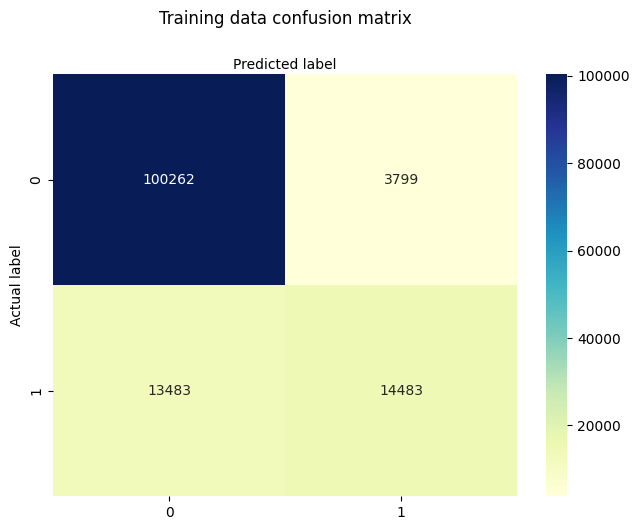

In [ ]:
# Training Data confusion matrix for random forest
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(train_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Training data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 427.9555555555555, 'Predicted label')

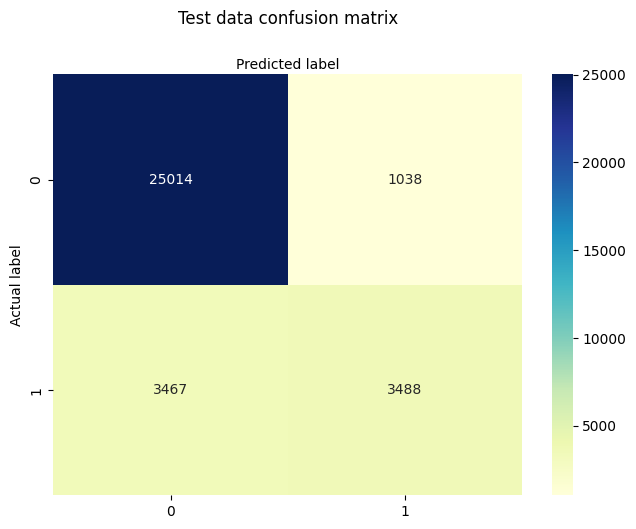

In [ ]:
# Testing Data confusion matrix for random forest
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(test_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Test data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
y_pred = tuned_rand_forest.predict(x_encoded_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
test_conf_matrix = confusion_matrix(y_test, y_pred)
test_class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(test_conf_matrix)
print("Classification Report:")
print(test_class_report)

Accuracy: 0.8635138001030085
Confusion Matrix:
[[25014  1038]
 [ 3467  3488]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     26052
           1       0.77      0.50      0.61      6955

    accuracy                           0.86     33007
   macro avg       0.82      0.73      0.76     33007
weighted avg       0.86      0.86      0.85     33007



# Unbalanced Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

rand_forest = RandomForestClassifier(class_weight={0: 0.2, 1: 0.8})

# Parameter Grid
param_grid = {
    'n_estimators': [10, 100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [2, 4, 6, 8, 10],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Grid Search
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rand_forest, param_grid, cv=kf, n_jobs=-1)
grid_search.fit(x_encoded_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100]})

In [ ]:
best_params = grid_search.best_params_
best_params['class_weight'] = {0: 0.2, 1: 0.8}
tuned_rand_forest = RandomForestClassifier(**best_params)
tuned_rand_forest.fit(x_encoded_train, y_train)
best_params

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'class_weight': {0: 0.2, 1: 0.8}}

In [ ]:
# Predict
rand_forest_y_train_pred = tuned_rand_forest.predict(x_encoded_train)
train_conf_matrix = confusion_matrix(y_train, rand_forest_y_train_pred)
print("Confusion Matrix (Training Data):\n", train_conf_matrix)
print("\nClassification Report (Training Data):\n", classification_report(y_train, rand_forest_y_train_pred))

# On testing data
rand_forest_y_test_pred = tuned_rand_forest.predict(x_encoded_test)
test_conf_matrix = confusion_matrix(y_test, rand_forest_y_test_pred)
print("\nConfusion Matrix (Testing Data):\n", test_conf_matrix)
print("\nClassification Report (Testing Data):\n", classification_report(y_test, rand_forest_y_test_pred))

Confusion Matrix (Training Data):
 [[85425 18636]
 [ 5218 22748]]

Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.94      0.82      0.88    104061
           1       0.55      0.81      0.66     27966

    accuracy                           0.82    132027
   macro avg       0.75      0.82      0.77    132027
weighted avg       0.86      0.82      0.83    132027


Confusion Matrix (Testing Data):
 [[21157  4895]
 [ 1452  5503]]

Classification Report (Testing Data):
               precision    recall  f1-score   support

           0       0.94      0.81      0.87     26052
           1       0.53      0.79      0.63      6955

    accuracy                           0.81     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.81      0.82     33007



In [ ]:
# import required modules for performance evaluation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

Text(0.5, 427.9555555555555, 'Predicted label')

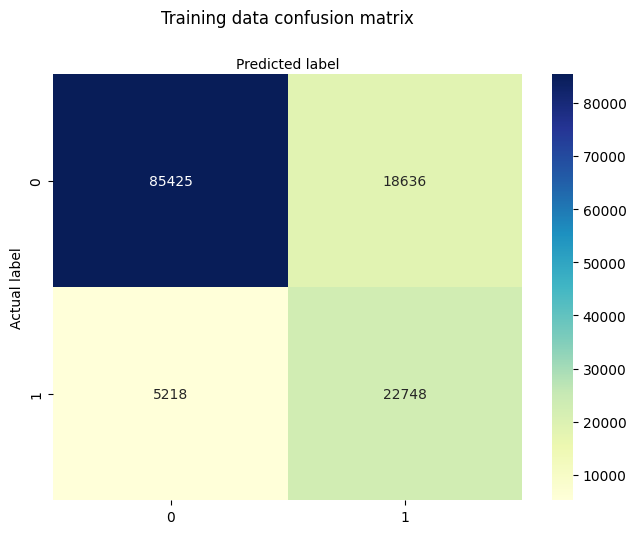

In [ ]:
# Training Data confusion matrix for random forest
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(train_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Training data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 427.9555555555555, 'Predicted label')

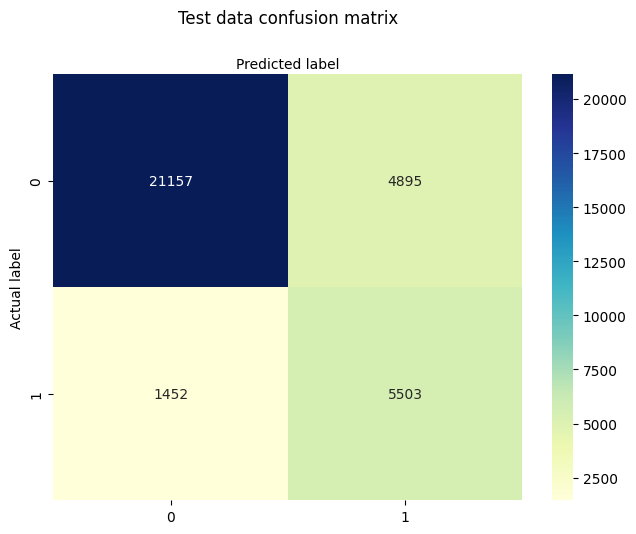

In [ ]:
# Testing Data confusion matrix for random forest
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(test_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Test data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
y_pred = tuned_rand_forest.predict(x_encoded_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
test_conf_matrix = confusion_matrix(y_test, y_pred)
test_class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(test_conf_matrix)
print("Classification Report:")
print(test_class_report)

Accuracy: 0.807707455994183
Confusion Matrix:
[[21157  4895]
 [ 1452  5503]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     26052
           1       0.53      0.79      0.63      6955

    accuracy                           0.81     33007
   macro avg       0.73      0.80      0.75     33007
weighted avg       0.85      0.81      0.82     33007



<Axes: >

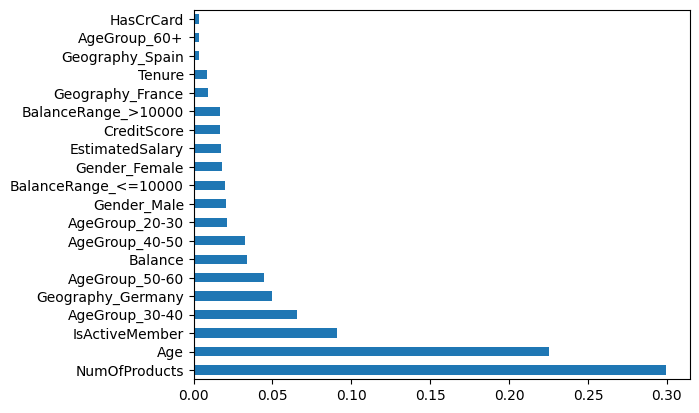

In [ ]:
feature_importance = pd.Series(tuned_rand_forest.feature_importances_, index=x_encoded_train.columns)
feature_importance.nlargest(20).plot(kind='barh')

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Standard Scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_encoded_train)
x_test_scaled = scaler.transform(x_encoded_test)


grad_boost = GradientBoostingClassifier()

# Parameter Grid
param_grid = {
    'n_estimators': [10, 100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [2, 4, 6, 8, 10],
    'criterion': ['friedman_mse', 'squared_error'],
}

# Grid Search
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(grad_boost, param_grid, cv=kf, n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

# Train on tuned logistic regression
best_params = grid_search.best_params_
tuned_grad_boost = GradientBoostingClassifier(**best_params)
tuned_grad_boost.fit(x_train_scaled, y_train)

GradientBoostingClassifier(max_depth=6, max_features='sqrt')

In [ ]:
# Gradient Boosting Best Params
best_params

{'criterion': 'friedman_mse',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [ ]:
# Predict
grad_boost_y_train_pred = tuned_grad_boost.predict(x_train_scaled)
train_conf_matrix = confusion_matrix(y_train, grad_boost_y_train_pred)
print("Confusion Matrix (Training Data):\n", train_conf_matrix)
print("\nClassification Report (Training Data):\n", classification_report(y_train, grad_boost_y_train_pred))

# On testing data
grad_boost_y_test_pred = tuned_grad_boost.predict(x_test_scaled)
test_conf_matrix = confusion_matrix(y_test, grad_boost_y_test_pred)
print("\nConfusion Matrix (Testing Data):\n", test_conf_matrix)
print("\nClassification Report (Testing Data):\n", classification_report(y_test, grad_boost_y_test_pred))

Confusion Matrix (Training Data):
 [[99098  4963]
 [12247 15719]]

Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.89      0.95      0.92    104061
           1       0.76      0.56      0.65     27966

    accuracy                           0.87    132027
   macro avg       0.83      0.76      0.78    132027
weighted avg       0.86      0.87      0.86    132027


Confusion Matrix (Testing Data):
 [[24722  1330]
 [ 3053  3902]]

Classification Report (Testing Data):
               precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.75      0.56      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007



In [ ]:
# import required modules for performance evaluation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

Text(0.5, 427.9555555555555, 'Predicted label')

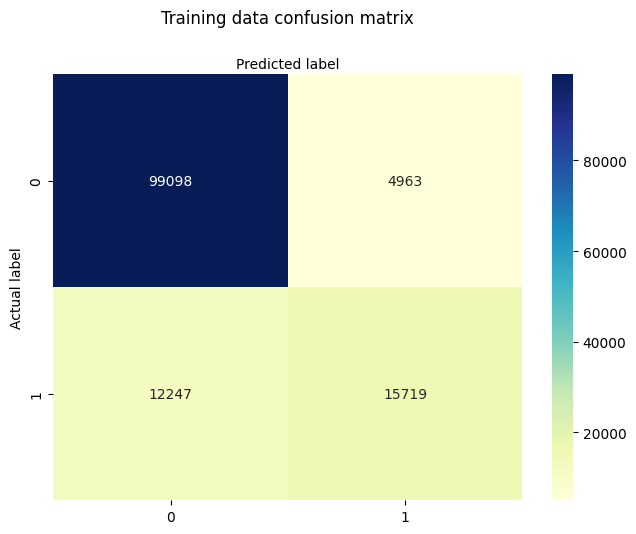

In [ ]:
# Training Data confusion matrix for gradient boost
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(train_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Training data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 427.9555555555555, 'Predicted label')

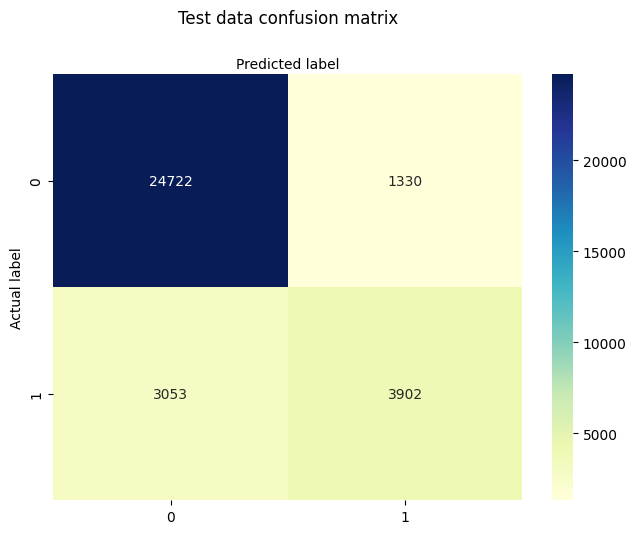

In [ ]:
# Test Data confusion matrix for gradient boost
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(test_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Test data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

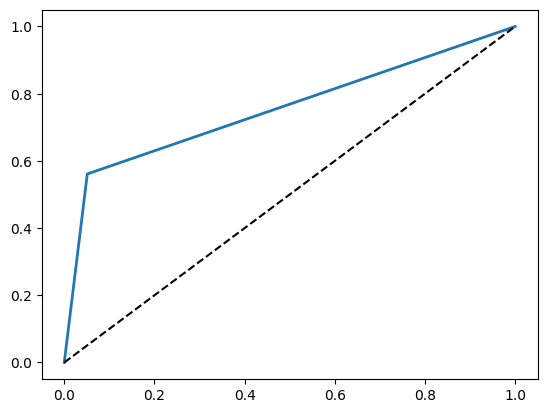

In [ ]:
# Gradient Boosting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, grad_boost_y_test_pred)
plt.plot(fpr, tpr, linewidth=2, label="ROC")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

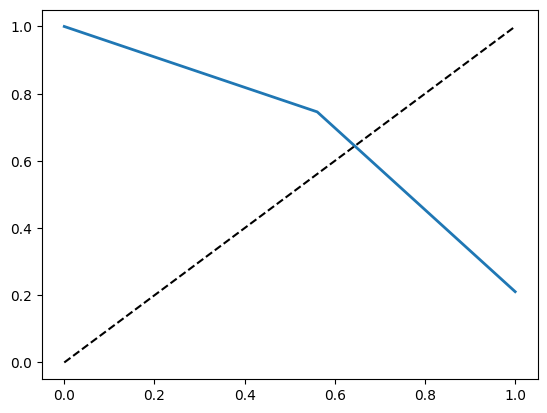

In [ ]:
# Gradient Boosting Precision vs Recall
precision, recall, thresholds = precision_recall_curve(y_test, grad_boost_y_test_pred)
plt.plot(recall, precision, linewidth=2, label="Precision vs Recall")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

In [ ]:
# Gradient Boosting F1 Score
f1_score(y_test, grad_boost_y_test_pred)

0.6403544760810699

# MLP

In [ ]:
import time
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Standard Scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_encoded_train)
x_test_scaled = scaler.transform(x_encoded_test)

# Define experimental design
layers = [2, 5]
nodes = [10, 20]

# Prepare data (Assuming x_train and y_train are already loaded)

# Initialize lists to store results
time_taken = []
training_accuracy = []
testing_accuracy = []

# Iterate over each combination of layers and nodes
for layer in layers:
    for node in nodes:
        # Create neural network with current layer and node configuration
        neural_net = MLPClassifier(hidden_layer_sizes=(node,) * layer, max_iter=1000)

        # Start training timer
        start_time = time.time()

        # Train neural network
        neural_net.fit(x_train_scaled, y_train)

        # Record time taken for training
        time_taken.append(time.time() - start_time)

        # Record training accuracy
        training_accuracy.append(neural_net.score(x_train_scaled, y_train))

        # Record testing accuracy
        testing_accuracy.append(neural_net.score(x_test_scaled, y_test))

# Print results
for i in range(len(layers)):
    for j in range(len(nodes)):
        print(f"Layers: {layers[i]}, Nodes: {nodes[j]}, Time: {time_taken[i*len(nodes)+j]}, Training Accuracy: {training_accuracy[i*len(nodes)+j]}, Testing Accuracy: {testing_accuracy[i*len(nodes)+j]}")

Layers: 2, Nodes: 10, Time: 15.594598293304443, Training Accuracy: 0.8646110265324517, Testing Accuracy: 0.864755960856788
Layers: 2, Nodes: 20, Time: 61.49535083770752, Training Accuracy: 0.8658607709029214, Testing Accuracy: 0.8656648589693096
Layers: 5, Nodes: 10, Time: 60.166245460510254, Training Accuracy: 0.8650806274474161, Testing Accuracy: 0.8650892234980458
Layers: 5, Nodes: 20, Time: 349.0801351070404, Training Accuracy: 0.868466298560143, Testing Accuracy: 0.8620595631229739


In [ ]:
for i in range(len(layers)):
    for j in range(len(nodes)):
        print(f"Layers: {layers[i]}, Nodes: {nodes[j]}, Time: {time_taken[i*len(nodes)+j]}, Training Accuracy: {training_accuracy[i*len(nodes)+j]}, Testing Accuracy: {testing_accuracy[i*len(nodes)+j]}")

Layers: 2, Nodes: 10, Time: 15.594598293304443, Training Accuracy: 0.8646110265324517, Testing Accuracy: 0.864755960856788
Layers: 2, Nodes: 20, Time: 61.49535083770752, Training Accuracy: 0.8658607709029214, Testing Accuracy: 0.8656648589693096
Layers: 5, Nodes: 10, Time: 60.166245460510254, Training Accuracy: 0.8650806274474161, Testing Accuracy: 0.8650892234980458
Layers: 5, Nodes: 20, Time: 349.0801351070404, Training Accuracy: 0.868466298560143, Testing Accuracy: 0.8620595631229739


In [ ]:
start_time = time.time()
neural_net = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)
neural_net.fit(x_train_scaled, y_train)
print(f'It takes {time.time() - start_time} seconds to train 10 nodes 2 layers NetWork')

It takes 19.880934238433838 seconds to train 10 nodes 2 layers NetWork


Text(0.5, 427.9555555555555, 'Predicted label')

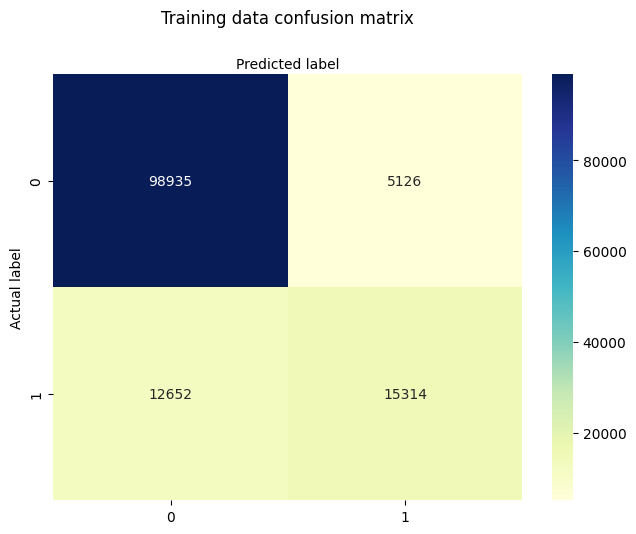

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Testing Data confusion matrix
neural_pred = neural_net.predict(x_train_scaled)
test_conf_matrix = confusion_matrix(y_train, neural_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(test_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Training data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, neural_pred)
train_conf_matrix = confusion_matrix(y_train, neural_pred)
train_class_report = classification_report(y_train, neural_pred)

# Print evaluation metrics
print(f"Accuracy: {train_accuracy}")
print("Confusion Matrix:")
print(train_conf_matrix)
print("Classification Report:")
print(train_class_report)

Accuracy: 0.8648609754065456
Confusion Matrix:
[[98643  5418]
 [12424 15542]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92    104061
           1       0.74      0.56      0.64     27966

    accuracy                           0.86    132027
   macro avg       0.81      0.75      0.78    132027
weighted avg       0.86      0.86      0.86    132027



Text(0.5, 427.9555555555555, 'Predicted label')

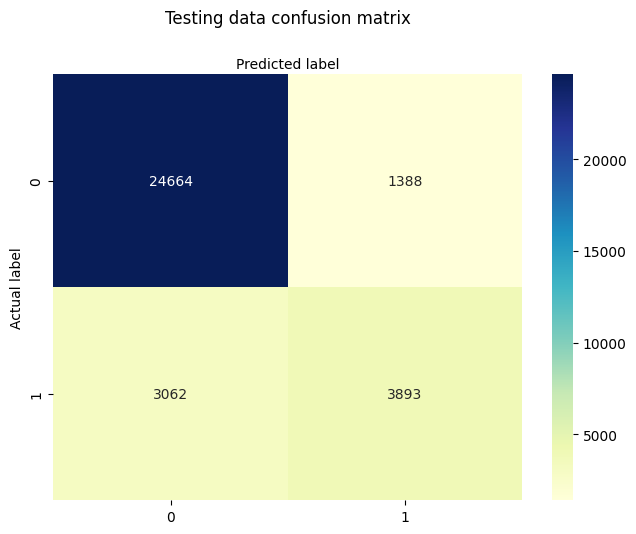

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Testing Data confusion matrix
neural_pred = neural_net.predict(x_test_scaled)
test_conf_matrix = confusion_matrix(y_test, neural_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(test_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Testing data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
y_pred = neural_net.predict(x_test_scaled)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
test_conf_matrix = confusion_matrix(y_test, y_pred)
test_class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(test_conf_matrix)
print("Classification Report:")
print(test_class_report)

Accuracy: 0.865180113309298
Confusion Matrix:
[[24664  1388]
 [ 3062  3893]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.74      0.56      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.81      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007



# Unbalanced Random Forest Kaggle Results

In [ ]:
test_df = pd.read_csv('Bank_Churn/test.csv')
test_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [ ]:
test_df_ids = test_df['id']
encoded_test = test_df.drop(columns=['id', 'CustomerId' ,'Surname'])
encoded_test['BalanceRange'] = encoded_test['Balance'].apply(lambda x: '>10000' if x > 10000 else '<=10000')

bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']

encoded_test['AgeGroup'] = pd.cut(encoded_test['Age'], bins=bins, labels=labels, right=False)
encoded_test = pd.get_dummies(encoded_test)

In [ ]:
kaggle_predictions = tuned_rand_forest.predict(encoded_test)
kaggle_predictions

result = {'id': test_df_ids, 'Exited': kaggle_predictions}
result_df = pd.DataFrame(result)
result_df.to_csv('Bank_Churn/predictions.csv',index=False) # this leads to a ~0.8 score on Kaggle

In [ ]:
result_df.Exited.value_counts()

Exited
0    75535
1    34488
Name: count, dtype: int64

# **Model Evaluation**

In [ ]:
acc_train=[0.84,0.86,0.87,0.82,0.87,0.86]
acc_test=[0.84,0.85,0.86,0.81,0.87,0.87]
recall_train=[0.43,0.51,0.52,0.81,0.56,0.56]
recall_test=[0.43,0.49,0.51,0.79,0.56,0.56]
precision_train=[0.71,0.77,0.79,0.55,0.76,0.74]
precision_test=[0.71,0.73,0.77,0.53,0.75,0.74]

comparison_frame = pd.DataFrame({'Model':["LogisticRegression(With Penalty 5)","KNN with K=20",
                                          "Random Forest (Default)","Random Forest (Unbalanced {1:80%,0:20%})","Gradient Boosted(Default)",
                                          "Multi-Linear-Perceptron"],
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test})



comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,LogisticRegression(With Penalty 5),0.84,0.84,0.43,0.43,0.71,0.71
1,KNN with K=20,0.86,0.85,0.51,0.49,0.77,0.73
2,Random Forest (Default),0.87,0.86,0.52,0.51,0.79,0.77
3,"Random Forest (Unbalanced {1:80%,0:20%})",0.82,0.81,0.81,0.79,0.55,0.53
4,Gradient Boosted(Default),0.87,0.87,0.56,0.56,0.76,0.75
5,Multi-Linear-Perceptron,0.86,0.87,0.56,0.56,0.74,0.74


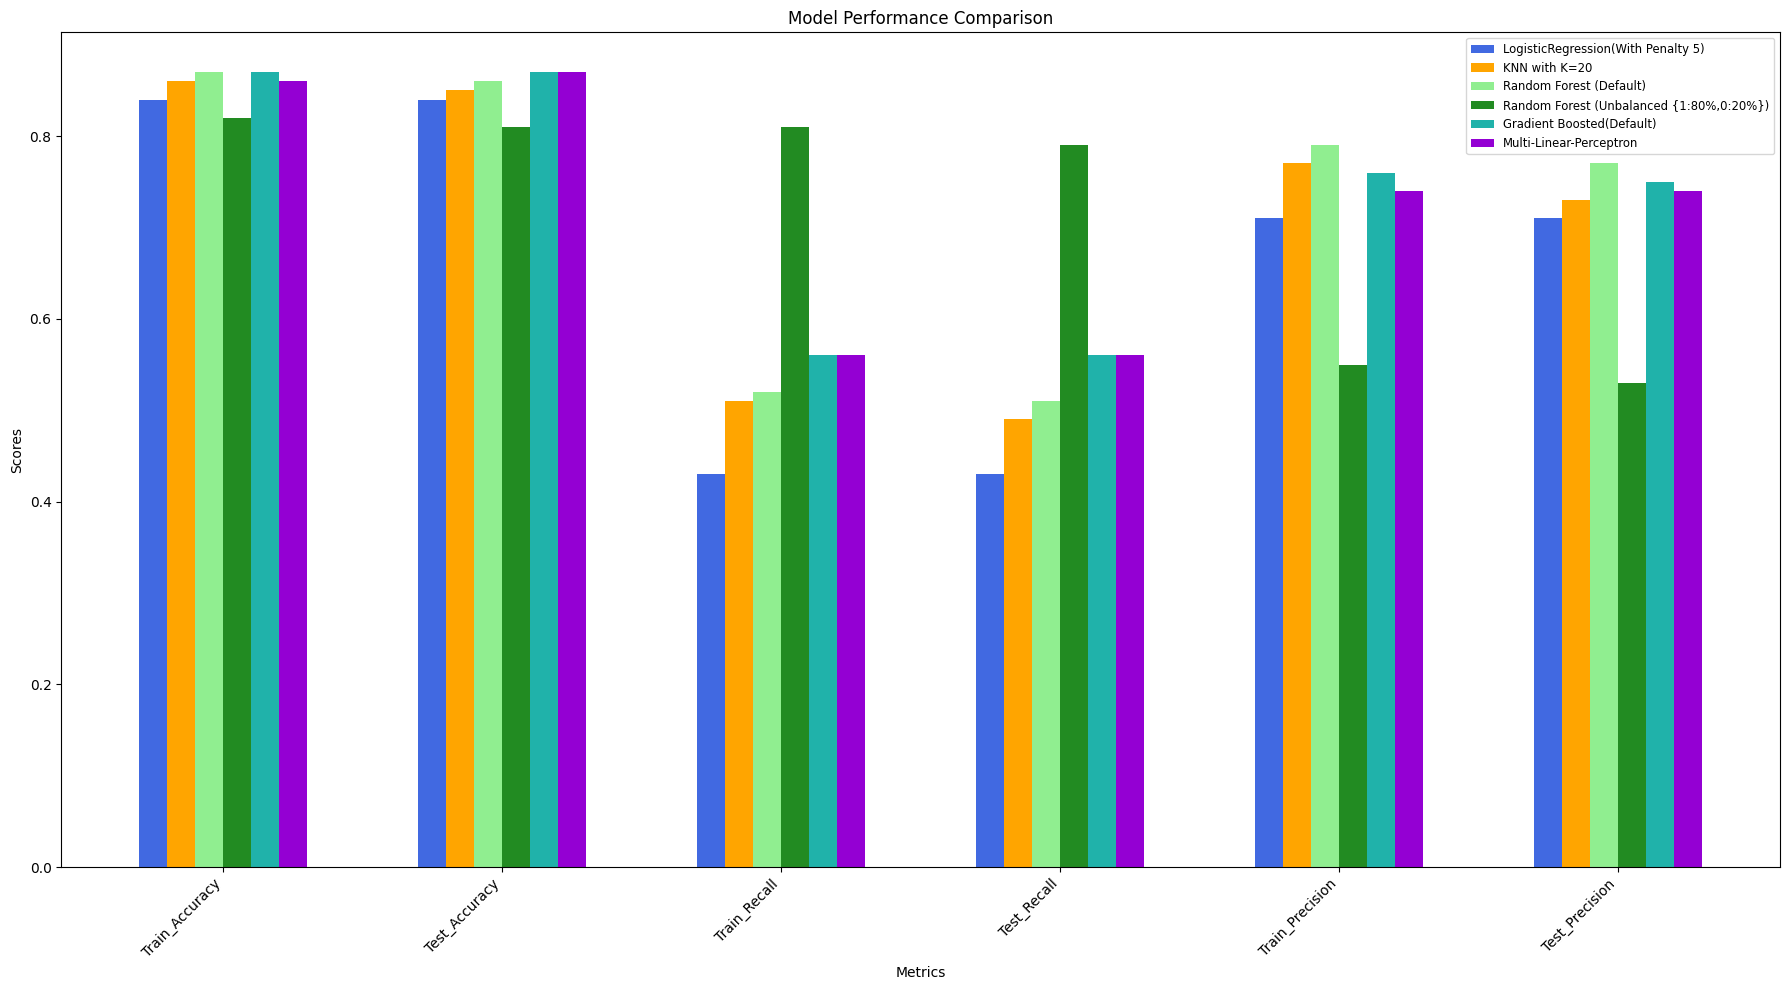

In [ ]:
fig, ax = plt.subplots(figsize=(18, 10))

# Define the x locations for the groups
metrics = ['Train_Accuracy', 'Test_Accuracy', 'Train_Recall', 'Test_Recall', 'Train_Precision', 'Test_Precision']
x = range(len(metrics))
width = 0.1
colors = ['royalblue', 'orange', 'lightgreen', 'forestgreen', 'lightseagreen', 'darkviolet']


# Plot each model's performance
for i, (model, color) in enumerate(zip(comparison_frame['Model'], colors)):
    ax.bar([p + i*width for p in x], comparison_frame.loc[i, metrics], width=width, label=model,color=color)

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks([p + 2.5*width for p in x])  # adjust for the number of models
ax.set_xticklabels(metrics, rotation=45, ha='right')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize='small')

plt.tight_layout()
plt.show()